In [1]:
%pylab inline
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (6,6)
import plotly.express as px 


Populating the interactive namespace from numpy and matplotlib


In [2]:
%config Completer.use_jedi = False

In [3]:
import pathlib

In [4]:
import pandas as pd
import numpy as np

In [5]:
DATA_DIR = pathlib.Path("../data")

In [6]:
!ls ../data

AEP_hourly.csv	   EKPC_hourly.csv		  __MACOSX
COMED_hourly.csv   est_hourly.paruqet		  NI_hourly.csv
DAYTON_hourly.csv  FE_hourly.csv		  PJME_hourly.csv
DEOK_hourly.csv    hourly-energy-consumption.zip  pjm_hourly_est.csv
DOM_hourly.csv	   LD2011_2014.txt		  PJM_Load_hourly.csv
DUQ_hourly.csv	   LD2011_2014.txt.zip		  PJMW_hourly.csv


In [7]:
eldata = pd.read_csv(DATA_DIR/'LD2011_2014.txt', sep=';', decimal=',')
eldata.columns = ["timestamp"]+[f"MT_{i+1:0>3}" for i in range(370)]

In [8]:
eldata["timestamp"] = pd.to_datetime(eldata.timestamp)

In [9]:
eldata = eldata.resample("1H", on="timestamp").mean()

In [10]:
data = eldata

# Adding calendar features
data["yearly_cycle"] = np.sin(2 * np.pi * data.index.dayofyear / 366)
data["weekly_cycle"] = np.sin(2 * np.pi * data.index.dayofweek / 7)
data["daily_cycle"] = np.sin(2 * np.pi * data.index.hour / 24)
calendar_features = ["yearly_cycle", "weekly_cycle", "daily_cycle"]

In [11]:
eldata

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,yearly_cycle,weekly_cycle,daily_cycle
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017166,-0.974928,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017166,-0.974928,0.258819
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017166,-0.974928,0.500000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017166,-0.974928,0.707107
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017166,-0.974928,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,2.220812,25.248933,1.737619,186.483740,92.073171,340.773810,11.305822,315.656566,91.783217,81.451613,...,2238.636364,74.967405,4.388531,375.768218,108.931553,688.416422,8405.405405,-0.017166,0.974928,-0.866025
2014-12-31 21:00:00,2.538071,22.759602,1.737619,162.093496,86.280488,319.940476,11.588468,269.360269,76.486014,70.161290,...,1477.272727,74.967405,3.949678,465.539947,154.841402,662.023460,8283.783784,-0.017166,0.974928,-0.707107
2014-12-31 22:00:00,1.903553,22.048364,1.737619,161.077236,86.890244,314.732143,11.305822,251.683502,71.678322,72.311828,...,1375.000000,64.211213,7.753072,655.179982,195.325543,679.252199,7594.594595,-0.017166,0.974928,-0.500000


In [12]:
# PyTorch imports
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, Dataset

# PyTorch Lightning imports
import pytorch_lightning as pl

In [101]:
horizon_size = 24
hidden_size = 10
quantiles = [0.5]
columns = ['MT_009']
dropout = 0.3
layer_size = 2
bidirection = False
lr = 1e-5
batch_size = 1
num_epochs = 100
context_size = 5
covariate_size = train_data[calendar_features].shape[1]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
class MQRNN_dataset(Dataset):
    """Sample data from electricity load dataset (per household, resampled to one hour)."""

    def __init__(self,
                series_df:pd.DataFrame,
                covariate_df:pd.DataFrame, 
                 
                horizon_size:int,
                quantile_size:int):
        
        self.series_df = series_df
        self.covariate_df = covariate_df
        self.horizon_size = horizon_size
        self.quantile_size = quantile_size
        
        full_covariate = []
        covariate_size = self.covariate_df.shape[1]
        print(f"self.covariate_df.shape[0] : {self.covariate_df.shape[0]}")
        for i in range(1, self.covariate_df.shape[0] - horizon_size+1):
            cur_covariate = []
            cur_covariate.append(self.covariate_df.iloc[i:i+horizon_size,:].to_numpy())
            full_covariate.append(cur_covariate)
        full_covariate = np.array(full_covariate)
        print(f"full_covariate shape: {full_covariate.shape}")
        full_covariate = full_covariate.reshape(-1, horizon_size * covariate_size)
        self.next_covariate = full_covariate
        
    def __len__(self):
        return self.series_df.shape[1]
    
    def __getitem__(self,idx):
        cur_series = np.array(self.series_df.iloc[: -self.horizon_size, idx])
        cur_covariate = np.array(self.covariate_df.iloc[:-self.horizon_size, :]) # covariate used in generating hidden states

        covariate_size = self.covariate_df.shape[1]

        real_vals_list = []
        for i in range(1, self.horizon_size+1):
            real_vals_list.append(np.array(self.series_df.iloc[i: self.series_df.shape[0]-self.horizon_size+i, idx]))
        real_vals_array = np.array(real_vals_list) #[horizon_size, seq_len]
        real_vals_array = real_vals_array.T #[seq_len, horizon_size]
        cur_series_tensor = torch.tensor(cur_series)
        
        cur_series_tensor = torch.unsqueeze(cur_series_tensor,dim=1) # [seq_len, 1]
        cur_covariate_tensor = torch.tensor(cur_covariate) #[seq_len, covariate_size]
        cur_series_covariate_tensor = torch.cat([cur_series_tensor, cur_covariate_tensor],dim=1)
        next_covariate_tensor = torch.tensor(self.next_covariate) #[seq_len, horizon_size * covariate_size]

        cur_real_vals_tensor = torch.tensor(real_vals_array)
        return cur_series_covariate_tensor, next_covariate_tensor, cur_real_vals_tensor

In [37]:
class Encoder(pl.LightningModule):
    """
    Encoder of the Encoder-Decoder Structure. For MQ_RNN, this encoder
    is the same as the traditional seq2seq model, which is based on the LSTM.
    """
    def __init__(self, 
                horizon_size:int, 
                covariate_size:int, 
                hidden_size:int, 
                dropout:float, 
                layer_size:int, 
                by_direction:bool,
                device):
        super().__init__()
        self.horizon_size = horizon_size
        self.covariate_size = covariate_size
        self.hidden_size = hidden_size
        self.layer_size = layer_size
        self.by_direction = by_direction
        self.dropout = dropout
        self.LSTM = nn.LSTM(input_size= covariate_size+1, 
                            hidden_size=hidden_size, 
                            num_layers=layer_size, 
                            dropout=dropout,
                            bidirectional=by_direction)
        for param in self.LSTM.parameters():
            if len(param.shape) >= 2:
                torch.nn.init.orthogonal_(param.data)
            else:
                torch.nn.init.normal_(param.data)
    
    def forward(self, input):
        """
        For the RNN(LSTM), the input shape is [seq_len,batch_size,input_size]
        where input_size = covariate_size +1
        """
        seq_len = input.shape[0]
        batch_size = input.shape[1]
        input_size = input.shape[2]
        layer_size = self.layer_size
        direction_size = 1
        if self.by_direction:
            direction_size = 2
        outputs,_ = self.LSTM(input)
        outputs_reshape = outputs.view(seq_len,batch_size,direction_size,self.hidden_size)
        outputs_last_layer = outputs_reshape[:,:,-1,:]
        final_outputs = outputs_last_layer.view(seq_len,batch_size,self.hidden_size)
        return final_outputs

In [38]:
class GlobalDecoder(pl.LightningModule):
    """
    Based on the hidden tensor generated by the Encoder and the values
    of the covariate time series in prediction horizon
    input_size = hidden_size + covariate_size * horizon_size
    output_size: (horizon_size+1) * context_size
    """
    def __init__(self,
                 hidden_size:int, 
                 covariate_size:int,
                 horizon_size:int,
                 context_size:int):
        super().__init__()
        self.hidden_size = hidden_size
        self.covariate_size = covariate_size
        self.horizon_size = horizon_size
        self.context_size = context_size

        self.linear1 = nn.Linear(in_features= hidden_size + covariate_size*horizon_size, 
                                out_features= horizon_size*hidden_size*3)
        
        self.linear2 = nn.Linear(in_features= horizon_size*hidden_size*3, 
                                out_features= horizon_size*hidden_size*2)
        
        self.linear3 = nn.Linear(in_features= horizon_size*hidden_size*2, 
                                out_features= (horizon_size+1)*context_size)

        self.activation = nn.ReLU()
    def forward(self, input):
        layer1_output = self.linear1(input)
        layer1_output = self.activation(layer1_output)

        layer2_output = self.linear2(layer1_output)
        layer2_output = self.activation(layer2_output)

        layer3_output = self.linear3(layer2_output)
        layer3_output = self.activation(layer3_output)
        return layer3_output


class LocalDecoder(pl.LightningModule):
    """
    Based on the resulting tensor generated by the GlobalDecoder and the 
    covariate time series value at prediction step.
    input_size: (horizon_size+1)*context_size + horizon_size*covariate_size
    output_size: horizon_size * quantile_size
    """
    def __init__(self,
                covariate_size, 
                quantile_size,
                context_size,
                quantiles,
                horizon_size):
        super().__init__()
        self.covariate_size = covariate_size
        self.quantiles = quantiles
        self.quantile_size = quantile_size
        self.horizon_size = horizon_size
        self.context_size = context_size

        self.linear1 = nn.Linear(in_features= horizon_size*context_size + horizon_size* covariate_size + context_size,
                                 out_features= horizon_size* context_size)
        self.linear2 = nn.Linear(in_features= horizon_size* context_size,
                                 out_features= horizon_size* quantile_size)
        self.activation = nn.ReLU()
    
    def forward(self,input):
        layer1_output = self.linear1(input)
        layer1_output = self.activation(layer1_output)

        layer2_output = self.linear2(layer1_output)
        layer2_output = self.activation(layer2_output)
        return layer2_output

In [39]:
class MQRNN:
    """
    This class holds the encoder and the global decoder and local decoder.
    """
    def __init__(self, 
                horizon_size:int, 
                hidden_size:int, 
                quantiles:list,
                columns:list, 
                dropout:float,
                layer_size:int,
                by_direction:bool,
                lr:float,
                batch_size:int, 
                num_epochs:int, 
                context_size:int, 
                covariate_size:int,
                device):
        print(f"device is: {device}")
        self.device = device
        self.horizon_size = horizon_size
        self.quantile_size = len(quantiles)
        self.quantiles = quantiles
        self.lr = lr 
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.covariate_size = covariate_size
        quantile_size = self.quantile_size
        self.encoder = Encoder(horizon_size=horizon_size,
                               covariate_size=covariate_size,
                               hidden_size=hidden_size, 
                               dropout=dropout,
                               layer_size=layer_size,
                               by_direction=by_direction,
                               device=device)
        
        self.gdecoder = GlobalDecoder(hidden_size=hidden_size,
                                    covariate_size=covariate_size,
                                    horizon_size=horizon_size,
                                    context_size=context_size)
        self.ldecoder = LocalDecoder(covariate_size=covariate_size,
                                    quantile_size=quantile_size,
                                    context_size=context_size,
                                    quantiles=quantiles,
                                    horizon_size=horizon_size)
        self.encoder.double()
        self.gdecoder.double()
        self.ldecoder.double()
    
    def train(self, dataset:MQRNN_dataset):
        
        train_fn(encoder=self.encoder, 
                gdecoder=self.gdecoder, 
                ldecoder=self.ldecoder,
                dataset=dataset,
                lr=self.lr,
                batch_size=self.batch_size,
                num_epochs=self.num_epochs,
                device=self.device)
        print("training finished")
    
    def predict(self, train_target_df, train_covariate_df, test_covariate_df, col_name):

        input_target_tensor = torch.tensor(train_target_df[[col_name]].to_numpy())
        full_covariate = train_covariate_df.to_numpy()
        full_covariate_tensor = torch.tensor(full_covariate)

        next_covariate = test_covariate_df.to_numpy()
        next_covariate = next_covariate.reshape(-1, self.horizon_size * self.covariate_size)
        next_covariate_tensor = torch.tensor(next_covariate) #[1,horizon_size * covariate_size]
        print(f"next_covariate_tensor: {next_covariate_tensor.shape}")
        input_target_tensor = input_target_tensor.to(self.device)
        full_covariate_tensor = full_covariate_tensor.to(self.device)
        next_covariate_tensor = next_covariate_tensor.to(self.device)

        with torch.no_grad():
            input_target_covariate_tensor = torch.cat([input_target_tensor, full_covariate_tensor], dim=1)
            input_target_covariate_tensor = torch.unsqueeze(input_target_covariate_tensor, dim= 0) #[1, seq_len, 1+covariate_size]
            input_target_covariate_tensor = input_target_covariate_tensor.permute(1,0,2) #[seq_len, 1, 1+covariate_size]
            print(f"input_target_covariate_tensor shape: {input_target_covariate_tensor.shape}")
            outputs = self.encoder(input_target_covariate_tensor) #[seq_len,1,hidden_size]
            hidden = torch.unsqueeze(outputs[-1],dim=0) #[1,1,hidden_size]

            next_covariate_tensor = torch.unsqueeze(next_covariate_tensor, dim=0)

            print(f"hidden shape: {hidden.shape}")
            print(f"next_covariate_tensor: {next_covariate_tensor.shape}")
            gdecoder_input = torch.cat([hidden, next_covariate_tensor], dim=2) #[1,1, hidden + covariate_size* horizon_size]
            gdecoder_output = self.gdecoder( gdecoder_input) #[1,1,(horizon_size+1)*context_size]

            local_decoder_input = torch.cat([gdecoder_output, next_covariate_tensor], dim=2) #[1, 1,(horizon_size+1)*context_size + covariate_size * horizon_size]
            local_decoder_output = self.ldecoder( local_decoder_input) #[seq_len, batch_size, horizon_size* quantile_size]
            local_decoder_output = local_decoder_output.view(self.horizon_size,self.quantile_size)
            output_array = local_decoder_output.cpu().numpy()
            result_dict= {}
            for i in range(self.quantile_size):
                result_dict[self.quantiles[i]] = output_array[:,i]
            return result_dict

In [40]:
def calc_loss(
    cur_series_covariate_tensor : torch.Tensor, 
    next_covariate_tensor: torch.Tensor,
    cur_real_vals_tensor: torch.Tensor, 
            encoder: Encoder,
            gdecoder: GlobalDecoder,
            ldecoder: LocalDecoder,
            device):
    loss = torch.tensor([0.0], device=device)

    cur_series_covariate_tensor = cur_series_covariate_tensor.double().to(device) #[batch_size, seq_len, 1+covariate_size]
    next_covariate_tensor = next_covariate_tensor.double().to(device) # [batch_size, seq_len, covariate_size * horizon_size]
    cur_real_vals_tensor = cur_real_vals_tensor.double().to(device) # [batch_size, seq_len, horizon_size]

    encoder.to(device)
    gdecoder.to(device)
    ldecoder.to(device)

    cur_series_covariate_tensor = cur_series_covariate_tensor.permute(1,0,2) #[seq_len, batch_size, 1+covariate_size]
    next_covariate_tensor = next_covariate_tensor.permute(1,0,2) #[seq_len, batch_size, covariate_size * horizon_size]
    cur_real_vals_tensor = cur_real_vals_tensor.permute(1,0,2) #[seq_len, batch_size, horizon_size]
    enc_hs = encoder(cur_series_covariate_tensor) #[seq_len, batch_size, hidden_size]
    hidden_and_covariate = torch.cat([enc_hs, next_covariate_tensor], dim=2) #[seq_len, batch_size, hidden_size+covariate_size * horizon_size]
    gdecoder_output = gdecoder(hidden_and_covariate) #[seq_len, batch_size, (horizon_size+1)*context_size]

    context_size = ldecoder.context_size
    
    quantile_size = ldecoder.quantile_size
    horizon_size = encoder.horizon_size
    total_loss = torch.tensor([0.0],device=device)

    local_decoder_input = torch.cat([gdecoder_output, next_covariate_tensor], dim=2) #[seq_len, batch_size,(horizon_size+1)*context_size + covariate_size * horizon_size]
    local_decoder_output = ldecoder( local_decoder_input) #[seq_len, batch_size, horizon_size* quantile_size]
    seq_len = local_decoder_output.shape[0]
    batch_size = local_decoder_output.shape[1]
    
    local_decoder_output = local_decoder_output.view(seq_len, batch_size, horizon_size, quantile_size) #[[seq_len, batch_size, horizon_size, quantile_size]]
    for i in range(quantile_size):
        p = ldecoder.quantiles[i]
        errors = cur_real_vals_tensor - local_decoder_output[:,:,:,i]
        cur_loss = torch.max( (p-1)*errors, p*errors ) # CAUTION
        total_loss += torch.sum(cur_loss)
    return total_loss


def train_fn(encoder:Encoder, 
            gdecoder: GlobalDecoder, 
            ldecoder: LocalDecoder,
            dataset: MQRNN_dataset, 
            lr: float, 
            batch_size: int,
            num_epochs: int, 
            device):
    
    encoder_optimizer = torch.optim.Adam(encoder.parameters(),lr=lr)
    gdecoder_optimizer = torch.optim.Adam(gdecoder.parameters(),lr=lr)
    ldecoder_optimizer = torch.optim.Adam(ldecoder.parameters(), lr=lr)

    data_iter = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True,num_workers=0)
    l_sum = 0.0
    for i in range(num_epochs):
        print(f"epoch_num:{i}")
        epoch_loss_sum = 0.0
        total_sample = 0
        for (cur_series_tensor, cur_covariate_tensor, cur_real_vals_tensor) in data_iter:
            batch_size = cur_series_tensor.shape[0]
            seq_len = cur_series_tensor.shape[1]
            horizon_size = cur_covariate_tensor.shape[-1]
            total_sample += batch_size * seq_len * horizon_size
            encoder_optimizer.zero_grad()
            gdecoder_optimizer.zero_grad()
            ldecoder_optimizer.zero_grad()
            loss = calc_loss(cur_series_tensor, cur_covariate_tensor, cur_real_vals_tensor, 
                             encoder, gdecoder, ldecoder,device)
            loss.backward()
            encoder_optimizer.step()
            gdecoder_optimizer.step()
            ldecoder_optimizer.step()
            epoch_loss_sum += loss.item()
        epoch_loss_mean = epoch_loss_sum/ total_sample
        print(f"epoch_num {i+1}, current loss is: {epoch_loss_mean}")

In [41]:
covariate_df = train_data[calendar_features]

full_covariate = []
covariate_size = covariate_df.shape[1]
for i in range(1, covariate_df.shape[0] - horizon_size+1):
    cur_covariate = []
    cur_covariate.append(covariate_df.iloc[i:i+horizon_size,:].to_numpy())
    full_covariate.append(cur_covariate)
full_covariate = np.array(full_covariate)
print(f"full_covariate shape: {full_covariate.shape}")
full_covariate = full_covariate.reshape(-1, horizon_size * covariate_size)
next_covariate = full_covariate

full_covariate shape: (720, 1, 24, 3)


In [31]:
full_covariate[0]

array([ 1.71663298e-02,  7.81831482e-01,  2.58819045e-01,  1.71663298e-02,
        7.81831482e-01,  5.00000000e-01,  1.71663298e-02,  7.81831482e-01,
        7.07106781e-01,  1.71663298e-02,  7.81831482e-01,  8.66025404e-01,
        1.71663298e-02,  7.81831482e-01,  9.65925826e-01,  1.71663298e-02,
        7.81831482e-01,  1.00000000e+00,  1.71663298e-02,  7.81831482e-01,
        9.65925826e-01,  1.71663298e-02,  7.81831482e-01,  8.66025404e-01,
        1.71663298e-02,  7.81831482e-01,  7.07106781e-01,  1.71663298e-02,
        7.81831482e-01,  5.00000000e-01,  1.71663298e-02,  7.81831482e-01,
        2.58819045e-01,  1.71663298e-02,  7.81831482e-01,  1.22464680e-16,
        1.71663298e-02,  7.81831482e-01, -2.58819045e-01,  1.71663298e-02,
        7.81831482e-01, -5.00000000e-01,  1.71663298e-02,  7.81831482e-01,
       -7.07106781e-01,  1.71663298e-02,  7.81831482e-01, -8.66025404e-01,
        1.71663298e-02,  7.81831482e-01, -9.65925826e-01,  1.71663298e-02,
        7.81831482e-01, -

24.0

In [22]:
covariate_df.shape[0] - horizon_size

720

In [42]:
train_data = data['2013-01-01':'2013-01-31']
test_data = data['2014-01-15':'2014-01-25']

In [43]:
train_data.shape, test_data.shape

((744, 373), (264, 373))

In [102]:
dset = MQRNN_dataset(
    train_data[columns], 
    train_data[calendar_features], 
    horizon_size, len(quantiles))

self.covariate_df.shape[0] : 744
full_covariate shape: (720, 1, 24, 3)


In [103]:
len(dset)

1

In [105]:
# (cur_series_tensor, cur_covariate_tensor, cur_real_vals_tensor)
dset[0][0]

tensor([[ 5.8566e+01,  1.7166e-02,  7.8183e-01,  0.0000e+00],
        [ 5.3759e+01,  1.7166e-02,  7.8183e-01,  2.5882e-01],
        [ 5.0699e+01,  1.7166e-02,  7.8183e-01,  5.0000e-01],
        ...,
        [ 7.1241e+01,  4.9255e-01,  9.7493e-01, -7.0711e-01],
        [ 7.3864e+01,  4.9255e-01,  9.7493e-01, -5.0000e-01],
        [ 6.0752e+01,  4.9255e-01,  9.7493e-01, -2.5882e-01]],
       dtype=torch.float64)

In [55]:
dset[0][0].shape

torch.Size([720, 4])

In [51]:
dset[0][1]

tensor([[ 0.0172,  0.7818,  0.2588,  ...,  0.0343,  0.9749,  0.0000],
        [ 0.0172,  0.7818,  0.5000,  ...,  0.0343,  0.9749,  0.2588],
        [ 0.0172,  0.7818,  0.7071,  ...,  0.0343,  0.9749,  0.5000],
        ...,
        [ 0.4925,  0.9749, -0.5000,  ...,  0.5074,  0.4339, -0.7071],
        [ 0.4925,  0.9749, -0.2588,  ...,  0.5074,  0.4339, -0.5000],
        [ 0.5074,  0.4339,  0.0000,  ...,  0.5074,  0.4339, -0.2588]],
       dtype=torch.float64)

In [56]:
dset[0][1].shape

torch.Size([720, 72])

In [54]:
dset[0][2]

tensor([[2.2208, 1.9036, 2.2208,  ..., 1.9036, 1.9036, 1.9036],
        [1.9036, 2.2208, 2.2208,  ..., 1.9036, 1.9036, 1.9036],
        [2.2208, 2.2208, 2.2208,  ..., 1.9036, 1.9036, 1.9036],
        ...,
        [1.9036, 1.9036, 1.9036,  ..., 1.9036, 1.9036, 1.9036],
        [1.9036, 1.9036, 1.9036,  ..., 1.9036, 1.9036, 1.9036],
        [1.9036, 1.9036, 2.2208,  ..., 1.9036, 1.9036, 1.9036]],
       dtype=torch.float64)

In [57]:
dset[0][2].shape

torch.Size([720, 24])

In [73]:
dset[0][0].shape

torch.Size([720, 4])

In [74]:
dset[0][0].permute(1,0).shape

torch.Size([4, 720])

In [78]:
enc = Encoder (horizon_size=horizon_size,
                               covariate_size=covariate_size,
                               hidden_size=hidden_size, 
                               dropout=dropout,
                               layer_size=layer_size,
                               by_direction=bidirection,
                               device=device, )


In [99]:
dset[0][0].reshape(720, 1, -1)

tensor([[[ 1.9036,  0.0172,  0.7818,  0.0000]],

        [[ 2.2208,  0.0172,  0.7818,  0.2588]],

        [[ 1.9036,  0.0172,  0.7818,  0.5000]],

        ...,

        [[ 1.9036,  0.4925,  0.9749, -0.7071]],

        [[ 1.9036,  0.4925,  0.9749, -0.5000]],

        [[ 1.9036,  0.4925,  0.9749, -0.2588]]], dtype=torch.float64)

In [96]:
inp = dset[0][0].reshape(720, 1, -1).to(device)

In [98]:
outputs,_ = enc(inp)

TypeError: lstm() received an invalid combination of arguments - got (Tensor, tuple, list, bool, int, float, Tensor, bool, bool), but expected one of:
 * (Tensor data, Tensor batch_sizes, tuple of Tensors hx, tuple of Tensors params, bool has_biases, int num_layers, float dropout, bool train, bool bidirectional)
      didn't match because some of the arguments have invalid types: ([32;1mTensor[0m, [31;1mtuple[0m, [31;1mlist[0m, [31;1mbool[0m, [31;1mint[0m, [31;1mfloat[0m, [31;1mTensor[0m, [32;1mbool[0m, [32;1mbool[0m)
 * (Tensor input, tuple of Tensors hx, tuple of Tensors params, bool has_biases, int num_layers, float dropout, bool train, bool bidirectional, bool batch_first)
      didn't match because some of the arguments have invalid types: ([32;1mTensor[0m, [31;1mtuple[0m, [31;1mlist[0m, [32;1mbool[0m, [32;1mint[0m, [32;1mfloat[0m, [31;1mTensor[0m, [32;1mbool[0m, [32;1mbool[0m)


In [86]:
dset[0][0].shape

torch.Size([720, 4])

In [82]:
hidden_and_covariate = torch.cat([o, dset[0][1]], dim=2)

TypeError: expected Tensor as element 0 in argument 0, but got Encoder

In [537]:
net = MQRNN(horizon_size,hidden_size,quantiles,columns,dropout,layer_size,by_direction,lr,batch_size,num_epochs,context_size,covariate_size,device)

device is: cuda:0


In [ ]:
net.train(dset)

epoch_num:0
epoch_num 1, current loss is: 47.52432758971537
epoch_num:1
epoch_num 2, current loss is: 47.4727406870575
epoch_num:2
epoch_num 3, current loss is: 47.28824751387129
epoch_num:3
epoch_num 4, current loss is: 47.07916527978173
epoch_num:4
epoch_num 5, current loss is: 46.70357092810584
epoch_num:5
epoch_num 6, current loss is: 46.68146937505539
epoch_num:6
epoch_num 7, current loss is: 46.543156704474654
epoch_num:7
epoch_num 8, current loss is: 46.0474610059278
epoch_num:8
epoch_num 9, current loss is: 45.80916824132075
epoch_num:9
epoch_num 10, current loss is: 45.460688556394935
epoch_num:10
epoch_num 11, current loss is: 45.21793850776232
epoch_num:11
epoch_num 12, current loss is: 45.06724994159198
epoch_num:12
epoch_num 13, current loss is: 44.69697870681554
epoch_num:13
epoch_num 14, current loss is: 44.271646213270564
epoch_num:14
epoch_num 15, current loss is: 43.98615148799516
epoch_num:15
epoch_num 16, current loss is: 43.76993966561777
epoch_num:16
epoch_num 17,

In [539]:
predict_result = net.predict(train_data[['MT_001']],
                             train_data[calendar_features],
                             test_data[calendar_features].iloc[:24],'MT_001' )
predict_result

next_covariate_tensor: torch.Size([1, 72])
input_target_covariate_tensor shape: torch.Size([744, 1, 4])
hidden shape: torch.Size([1, 1, 10])
next_covariate_tensor: torch.Size([1, 1, 72])


{0.5: array([0.6009181 , 0.35534636, 0.68521822, 0.        , 0.23799001,
        0.54889757, 0.53453678, 0.50091684, 0.93052481, 0.80801382,
        1.18888016, 2.10093618, 1.68143126, 2.2661765 , 1.93172359,
        2.05984066, 2.23449321, 2.72224579, 2.12253026, 1.86512103,
        2.14994886, 2.97963442, 1.31357233, 1.85019821])}

In [540]:
test_data['MT_001'].iloc[:24]

timestamp
2014-01-01 00:00:00    2.538071
2014-01-01 01:00:00    2.855330
2014-01-01 02:00:00    2.855330
2014-01-01 03:00:00    2.855330
2014-01-01 04:00:00    2.538071
2014-01-01 05:00:00    2.538071
2014-01-01 06:00:00    3.172589
2014-01-01 07:00:00    2.855330
2014-01-01 08:00:00    1.269036
2014-01-01 09:00:00    0.317259
2014-01-01 10:00:00    0.634518
2014-01-01 11:00:00    0.317259
2014-01-01 12:00:00    0.634518
2014-01-01 13:00:00    0.317259
2014-01-01 14:00:00    0.317259
2014-01-01 15:00:00    0.634518
2014-01-01 16:00:00    2.220812
2014-01-01 17:00:00    2.220812
2014-01-01 18:00:00    2.855330
2014-01-01 19:00:00    2.855330
2014-01-01 20:00:00    2.538071
2014-01-01 21:00:00    2.538071
2014-01-01 22:00:00    3.172589
2014-01-01 23:00:00    2.538071
Freq: H, Name: MT_001, dtype: float64

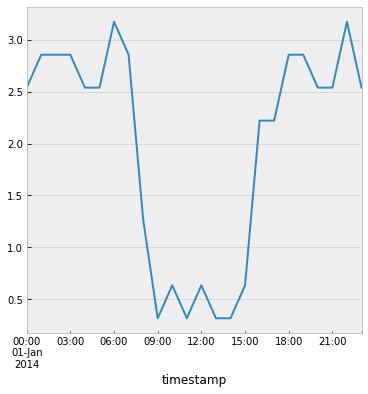

In [544]:
test_data['MT_001'].iloc[:24].plot()

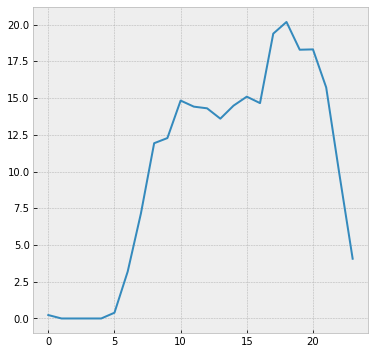

In [545]:
pd.Series([ 0.23308812,  0.        ,  0.        ,  0.        ,  0.        ,
         0.3913725 ,  3.19106859,  7.14803771, 11.92542916, 12.27502109,
        14.82619404, 14.41298485, 14.2994921 , 13.59568648, 14.48236907,
        15.09319913, 14.65374491, 19.38039233, 20.17507697, 18.28639495,
        18.3090245 , 15.72005723,  9.80488001,  4.06505978]).plot()

In [39]:
# Structure of neural network
class MQRNN(nn.Module):
    def __init__(self, device, output_horizon = 5, n_products = 100,  hidden_dim = 200, n_layers = 2):
        self.device = device
        super(MQRNN, self).__init__()
        # encoded = hidden_dim*2
        self.device = device
        encoded = hidden_dim
        self.output_horizon = output_horizon
        self.n_products = n_products
        self.output = output_horizon*n_products
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # LAYERS
        self.LSTM_encoding = nn.LSTM(self.n_products, self.hidden_dim, self.n_layers, batch_first=True).to(self.device)

        self.MLPglob = nn.Linear(encoded, self.output+1).to(self.device)

        self.MLPlocs = nn.ModuleList([nn.Linear(2, 3) for i in range(self.output)]).to(self.device)

    def init_hidden(self, batch_size):
        h0, c0 = (torch.zeros(self.n_layers, batch_size, self.hidden_dim),
                  torch.zeros(self.n_layers, batch_size, self.hidden_dim))
        return h0.to(device), c0.to(device)

    def forward(self, x):
        batch_size = x.size(0)
        _, (h, c) = self.LSTM_encoding(x.to(device), self.init_hidden(batch_size))
        # h, c = h[-1], c[-1]
        # hc = torch.cat((h,c),1) 
        # hc = F.relu(hc)
        # C = self.MLPglob(hc)
        c = F.relu(h[-1])
        C = self.MLPglob(c)
        C = F.relu(C)
        C, Ca = C[:,:-1], C[:,-1:]
        C = C.view(-1,self.n_products,self.output_horizon)
        output = torch.rand(self.n_products,self.output_horizon,batch_size,3).to(self.device)  
        # output[0,0] = self.MLPlocs[0](torch.cat((C[:, 0, 0].view(-1,1), Ca),1))
        for i in range(output.size(0)):
            for j in range(output.size(1)):
                output[i,j] = self.MLPlocs[output.size(1)*i+j](torch.cat((C[:, i, j].view(-1,1), Ca),1))
        return output.permute(2,1,0,3)

# Loss function
def quantile_loss(y_pred, y_real):
    """
    :param y_pred: 4 dimensions: batch_size, horizon, n_products, n_quantiles
    :param y_real: 3 dimensions: batch_size, horizon, n_products
    :return:
    """
    
    y_pred = y_pred.permute(3,0,1,2)
    loss = 2*(
                    F.mse_loss(y_real, y_pred[0]) + 
                    F.mse_loss(y_real, y_pred[1]) + 
                    F.mse_loss(y_real, y_pred[2]))

    loss = loss/sum(sum(sum(y_real)))

    return loss

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Sample data
x_1 = torch.FloatTensor([[[5000],[5043],[5015],[5100],[5109],[5150],[5183],[5222],[5243],[5259],[5298],
                     [5350],[5340],[5392],[5422],[5465],[5492],[5520],[5589],[5643]]]).to(device)
y_1 = torch.FloatTensor([[[5700],[5743],[5798],[5782],[5834]]]).to(device)

x_2 = torch.FloatTensor([[[5000],[5050],[5100],[5150],[5200],[5250],[5300],[5350],[5400],[5450],[5500],
                     [5550],[5600],[5650],[5700],[5750],[5800],[5850],[5900],[5950]]]).to(device)
y_2 = torch.FloatTensor([[[6000],[6050],[6100],[6150],[6200]]]).to(device)

x_3 = torch.FloatTensor([[[423],[413],[400],[392],[379],[354],[359],[352],[320],[298],[250],
                     [254],[243],[212],[2140],[201],[204],[254],[214],[355]]]).to(device)
y_3 = torch.FloatTensor([[[241],[231],[231],[221],[150]]]).to(device)

# xx = torch.cat((x_1, x_3)).permute(2,1,0).to(device)
# yy = torch.cat((y_1, y_3)).permute(2,1,0).to(device)
# xx_2 = xx*10
# yy_2 = yy*10

hidden_dim = 10
n_output = 5
n_products = xx.size(2)

model = MQRNN(device=device, n_products=n_products, n_layers=1,
              output_horizon=n_output, hidden_dim=hidden_dim)
model.to(device)

ADAM = torch.optim.Adam(model.parameters(), lr=20) #  lr=100.0126

n_epochs = 5000

for epoch in range(n_epochs):
    pred = model(xx)
    loss = quantile_loss(pred, yy)

    pred = model(xx_2)
    loss += quantile_loss(pred, yy_2)
    ADAM.zero_grad()
    loss.backward()
    ADAM.step()

    if epoch % 100 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 0/5000............. Loss: 36778.5586
Epoch: 100/5000............. Loss: 32703.1484
Epoch: 200/5000............. Loss: 29765.6504
Epoch: 300/5000............. Loss: 27737.5449
Epoch: 400/5000............. Loss: 26407.0488
Epoch: 500/5000............. Loss: 25583.6562
Epoch: 600/5000............. Loss: 25106.2812
Epoch: 700/5000............. Loss: 24848.6289
Epoch: 800/5000............. Loss: 24719.8496
Epoch: 900/5000............. Loss: 24660.4941
Epoch: 1000/5000............. Loss: 24635.3477
Epoch: 1100/5000............. Loss: 24625.5840
Epoch: 1200/5000............. Loss: 24622.1191
Epoch: 1300/5000............. Loss: 24620.9941
Epoch: 1400/5000............. Loss: 24620.6680
Epoch: 1500/5000............. Loss: 24620.5801
Epoch: 1600/5000............. Loss: 24620.5586


KeyboardInterrupt: 

In [191]:
xx.size(2)

2

In [192]:
xx

tensor([[[5000.,  423.],
         [5043.,  413.],
         [5015.,  400.],
         [5100.,  392.],
         [5109.,  379.],
         [5150.,  354.],
         [5183.,  359.],
         [5222.,  352.],
         [5243.,  320.],
         [5259.,  298.],
         [5298.,  250.],
         [5350.,  254.],
         [5340.,  243.],
         [5392.,  212.],
         [5422., 2140.],
         [5465.,  201.],
         [5492.,  204.],
         [5520.,  254.],
         [5589.,  214.],
         [5643.,  355.]]], device='cuda:0')

In [154]:
yy

tensor([[[5700.,  241.],
         [5743.,  231.],
         [5798.,  231.],
         [5782.,  221.],
         [5834.,  150.]]], device='cuda:0')

In [155]:
xx_2

tensor([[[50000.,  4230.],
         [50430.,  4130.],
         [50150.,  4000.],
         [51000.,  3920.],
         [51090.,  3790.],
         [51500.,  3540.],
         [51830.,  3590.],
         [52220.,  3520.],
         [52430.,  3200.],
         [52590.,  2980.],
         [52980.,  2500.],
         [53500.,  2540.],
         [53400.,  2430.],
         [53920.,  2120.],
         [54220., 21400.],
         [54650.,  2010.],
         [54920.,  2040.],
         [55200.,  2540.],
         [55890.,  2140.],
         [56430.,  3550.]]], device='cuda:0')

In [156]:
yy_2

tensor([[[57000.,  2410.],
         [57430.,  2310.],
         [57980.,  2310.],
         [57820.,  2210.],
         [58340.,  1500.]]], device='cuda:0')

In [152]:
x_1.plot()

AttributeError: 'Tensor' object has no attribute 'plot'

In [115]:
import pandas as pd 
import numpy as np
import torch
from torch.utils.data import Dataset


def read_df(config:dict):
    """
    This function is for reading the sample testing dataframe
    """
    time_range = pd.date_range('2010-01-01','2020-12-01',freq='12h')
    time_len = len(time_range)
    series_dict = {}
    for i in range(5):
        cur_vals = [np.sin(i*t) for t in range(time_len)]
        series_dict[i] = cur_vals
    target_df = pd.DataFrame(index=time_range, 
                             data=series_dict)
    horizon_size = config['horizon_size']
    covariate_df = pd.DataFrame(index=target_df.index,
                                data={'hour':target_df.index.hour,
                                      'dayofweek':target_df.index.dayofweek,
                                      'month': target_df.index.month
                                })
    for col in covariate_df.columns:
        covariate_df[col] = (covariate_df[col] - np.mean(covariate_df[col]))/np.std(covariate_df[col])
    
    train_target_df = target_df.iloc[:-horizon_size,:]
    test_target_df = target_df.iloc[-horizon_size:,:]
    train_covariate_df = covariate_df.iloc[:-horizon_size,:]
    test_covariate_df = covariate_df.iloc[-horizon_size:,:]

    small_train_target_df = train_target_df.iloc[-1000:,:].copy()
    small_train_covariate_df = train_covariate_df.iloc[-1000:,:].copy()
    return small_train_target_df, test_target_df, small_train_covariate_df, test_covariate_df

In [116]:
df = read_df({"horizon_size":12})

In [118]:
px.scatter(df[0])

In [119]:
px.scatter(df[1])